In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

readFileA = pd.read_csv("knolders_data.csv")
readFileB = pd.read_csv("monthly_contribution.csv")
df_Knolders = pd.DataFrame(readFileA)
df_Contributions = pd.DataFrame(readFileB)
pd.set_option("display.max_columns",30)
pd.set_option('display.max_rows',1000)

In [2]:
df_Knolders.head()

,id,full_name,wordpress_id,email_id,active_status,studio_id,role,github_id
0,17,Divyansh Jain,divyanshjain837,NaN,False,NaN,employee,NaN
1,14,Ayush Hooda,ayushhooda14,ayush.hooda@knoldus.com,False,NaN,employee,NaN
2,18,Niharika Datta,niharika76,niharika.datta@knoldus.com,False,NaN,employee,NaN
3,2,Manish Kumar Mishra,knoldermanish,manish@knoldus.com,True,11.0,employee,NaN
4,4,Pranjut Protim Gogoi,pranjut,pranjut@knoldus.com,False,NaN,employee,NaN


In [3]:
df_Contributions.drop(['id'], axis=1, inplace=True)
df_Contributions.head()

,knolder_id,blog_score,knolx_score,webinar_score,techhub_score,oscontribution_score,conference_score,book_score,researchpaper_score,month,year,meetup_score,pmotemplates_score,processeddocuments_score,proposal_score
0,57,10,0,0,0,30,0,0,0,MAY,2021,0,0,0,0
1,4,0,0,0,0,0,0,0,0,MARCH,2010,0,0,0,0
2,6,0,0,0,0,0,0,0,0,MARCH,2010,0,0,0,0
3,7,0,0,0,0,0,0,0,0,MARCH,2010,0,0,0,0
4,8,0,0,0,0,0,0,0,0,MARCH,2010,0,0,0,0


In [4]:
df_Knolders.rename(columns = {'id':'knolder_id'}, inplace = True)

In [5]:
len(df_Contributions['knolder_id'].unique())

449

In [6]:
merged_df = pd.merge(df_Knolders, df_Contributions, on=["knolder_id"], how="inner")

In [7]:
#excluding columns to avoid counting for non-zeros from them

# exclude_Col = ["knolder_id","full_name","wordpress_id","email_id","active_status","studio_id","role","github_id","month","year"]
# include_cols = ~merged_df.columns.isin(exclude_Col)

# non_zero_mask = (merged_df.loc[:,include_cols]).any(axis=1)

In [8]:
merged_df.head()

,knolder_id,full_name,wordpress_id,email_id,active_status,studio_id,role,github_id,blog_score,knolx_score,webinar_score,techhub_score,oscontribution_score,conference_score,book_score,researchpaper_score,month,year,meetup_score,pmotemplates_score,processeddocuments_score,proposal_score
0,17,Divyansh Jain,divyanshjain837,NaN,False,NaN,employee,NaN,0,0,0,0,0,0,0,0,MARCH,2010,0,0,0,0
1,17,Divyansh Jain,divyanshjain837,NaN,False,NaN,employee,NaN,0,0,0,0,0,0,0,0,APRIL,2010,0,0,0,0
2,17,Divyansh Jain,divyanshjain837,NaN,False,NaN,employee,NaN,0,0,0,0,0,0,0,0,MAY,2010,0,0,0,0
3,17,Divyansh Jain,divyanshjain837,NaN,False,NaN,employee,NaN,0,0,0,0,0,0,0,0,JUNE,2010,0,0,0,0
4,17,Divyansh Jain,divyanshjain837,NaN,False,NaN,employee,NaN,0,0,0,0,0,0,0,0,JULY,2010,0,0,0,0


In [9]:
df_2022 = merged_df[(merged_df['studio_id'].notna()) & (merged_df['year'] == 2022)]

In [10]:
exclude_Col = ["knolder_id","full_name","wordpress_id","email_id","active_status","studio_id","role","github_id","month","year"]
include_cols = ~df_2022.columns.isin(exclude_Col)

In [11]:
df_2022

,knolder_id,full_name,wordpress_id,email_id,active_status,studio_id,role,github_id,blog_score,knolx_score,webinar_score,techhub_score,oscontribution_score,conference_score,book_score,researchpaper_score,month,year,meetup_score,pmotemplates_score,processeddocuments_score,proposal_score
540,2,Manish Kumar Mishra,knoldermanish,manish@knoldus.com,True,11.0,employee,NaN,0,0,0,0,0,0,0,0,MAY,2022,0,0,0,0
541,2,Manish Kumar Mishra,knoldermanish,manish@knoldus.com,True,11.0,employee,NaN,0,0,0,0,0,0,0,0,JUNE,2022,0,0,0,0
543,2,Manish Kumar Mishra,knoldermanish,manish@knoldus.com,True,11.0,employee,NaN,0,0,0,0,0,0,0,0,JULY,2022,0,0,0,0
547,2,Manish Kumar Mishra,knoldermanish,manish@knoldus.com,True,11.0,employee,NaN,0,0,0,0,0,0,0,0,AUGUST,2022,0,0,0,0
549,2,Manish Kumar Mishra,knoldermanish,manish@knoldus.com,True,11.0,employee,NaN,0,0,0,0,0,0,0,0,SEPTEMBER,2022,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604157,135,Ankit Kumar,@ankitk9,ankit.kumar@knoldus.com,True,17.0,employee,ankitkumar2323,0,0,0,0,0,0,0,0,DECEMBER,2022,0,0,0,0
606679,135,Ankit Kumar,@ankitk9,ankit.kumar@knoldus.com,True,17.0,employee,ankitkumar2323,0,0,0,0,0,0,0,0,JANUARY,2022,0,0,0,0
606680,135,Ankit Kumar,@ankitk9,ankit.kumar@knoldus.com,True,17.0,employee,ankitkumar2323,0,0,0,0,0,0,0,0,FEBRUARY,2022,0,0,0,0
606681,135,Ankit Kumar,@ankitk9,ankit.kumar@knoldus.com,True,17.0,employee,ankitkumar2323,0,0,0,0,0,0,0,0,MARCH,2022,0,0,0,0


In [12]:
df_2022["total_score"] = df_2022.loc[:,include_cols].sum(axis=1)

/tmp/ipykernel_30074/594261288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022["total_score"] = df_2022.loc[:,include_cols].sum(axis=1)


In [13]:
yearly_sum = df_2022.groupby(['studio_id','year'])["total_score"].sum()

In [14]:
overall_scr = df_2022.groupby(['studio_id'])["total_score"].sum()
overall_scr

studio_id
1.0        0
2.0      100
3.0      415
4.0     9370
5.0        0
6.0        0
7.0      760
8.0     2405
9.0        0
11.0    1780
12.0       0
13.0      50
14.0       5
15.0       0
16.0       0
17.0     800
18.0       0
19.0       0
20.0       0
Name: total_score, dtype: int64

In [15]:
# totl_df = merged_df.loc[(merged_df["studio_id"] == 3.0) & (merged_df["year"] == 2022) & (merged_df["month"] == "JANUARY"),include_cols].sum()

In [49]:
fnl_df = df_2022.groupby(['studio_id','month','year'])["total_score"].sum()
fnl_df = fnl_df.reset_index()

In [17]:
fnl_df[(fnl_df["studio_id"] == 4) & (fnl_df["month"] == "MARCH")]

,studio_id,month,year,total_score
43,4.0,MARCH,2022,1515


In [18]:
# merged_df["year"].unique()

In [19]:
new_df = merged_df[(merged_df['studio_id'].notna()) & (merged_df['year'] <= 2022) & (merged_df['year'] >= 2018)]

In [20]:
new_df.shape

(9113, 22)

In [21]:
new_df.head()

,knolder_id,full_name,wordpress_id,email_id,active_status,studio_id,role,github_id,blog_score,knolx_score,webinar_score,techhub_score,oscontribution_score,conference_score,book_score,researchpaper_score,month,year,meetup_score,pmotemplates_score,processeddocuments_score,proposal_score
480,2,Manish Kumar Mishra,knoldermanish,manish@knoldus.com,True,11.0,employee,NaN,0,0,0,0,0,0,0,0,JANUARY,2018,0,0,0,0
481,2,Manish Kumar Mishra,knoldermanish,manish@knoldus.com,True,11.0,employee,NaN,0,0,0,0,0,0,0,0,FEBRUARY,2018,0,0,0,0
482,2,Manish Kumar Mishra,knoldermanish,manish@knoldus.com,True,11.0,employee,NaN,0,0,0,0,0,0,0,0,MARCH,2018,0,0,0,0
483,2,Manish Kumar Mishra,knoldermanish,manish@knoldus.com,True,11.0,employee,NaN,5,0,0,0,0,0,0,0,APRIL,2018,0,0,0,0
484,2,Manish Kumar Mishra,knoldermanish,manish@knoldus.com,True,11.0,employee,NaN,0,0,0,0,0,0,0,0,MAY,2018,0,0,0,0


In [22]:
new_df["total_score"] = new_df.loc[:,include_cols].sum(axis=1)

/tmp/ipykernel_30074/2626778989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["total_score"] = new_df.loc[:,include_cols].sum(axis=1)


In [23]:
indv_df = new_df.groupby(["knolder_id","full_name","year"])["total_score"].sum()

In [24]:
indv_df = indv_df.reset_index()
indv_df

,knolder_id,full_name,year,total_score
0,1,Sidharth Khattri,2018,55
1,1,Sidharth Khattri,2019,30
2,1,Sidharth Khattri,2020,0
3,1,Sidharth Khattri,2021,0
4,1,Sidharth Khattri,2022,0
...,...,...,...,...
1097,484,Esmatullah Farahi,2022,0
1098,485,Anushka Roy,2022,0
1099,486,Amelia Wasowski,2022,0
1100,488,Khalid,2022,0


In [25]:
import matplotlib.pyplot as plt

In [26]:
indv_df.shape

(1102, 4)

In [27]:
# new_list = range(math.floor(min(years)), math.ceil(max(years))+1)
# plt.xticks(new_list)

In [28]:
#function to take user_id and return its data
def ret_Indv_Data(user_id):
    part_df = indv_df.loc[indv_df["knolder_id"] == user_id]
    return part_df

In [50]:
#function to get scores and name of an individual
def dist_values(user_id):
    if user_id in indv_df["knolder_id"].values:
        user_score = []
        years = []
        user_name = ""
        df = ret_Indv_Data(user_id)
        
        #appending scores to user_scores
        for i in df["total_score"]:
            scr = i
            user_score.append(scr)
    
        #appending all present years to year variable
        for i in df["year"]:
            year = i
            years.append(year)
        
        user_name = df['full_name'].iloc[0]
        data = [user_name,user_score,years]
        return data
    
    else :
        no_user = "This value does not exists in Dataframe"
        return no_user

Enter Knolder ID:3


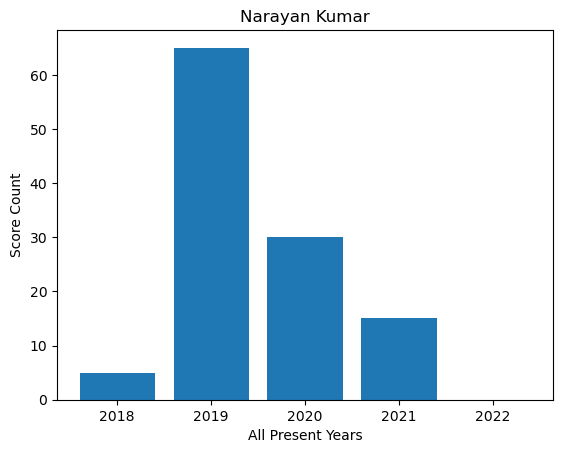

In [48]:
read = input("Enter Knolder ID:")
data = dist_values(int(read))
if (len(data[1]) == 1):
    print("This Person Has No Contributions!")

elif(len(data[1]) > 1):
    plt.title(data[0])
    plt.bar(data[2],data[1])
    plt.ylabel("Score Count")
    plt.xlabel('All Present Years')
    plt.show()
    
else:
    print(data)